## Gradient Decent
Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on a convex function, that tweaks it’s parameters iteratively to minimize a given function to its local minimum.

#### It is simply used to find the values of a functions parameters (coefficients) that minimize a cost function as far as possible. 

## What is a Gradient?

A gradient measures how much the output of a function changes if you change the inputs a little bit.

It simply measures the change in all weights with regard to the change in error. You can also think of a gradient as the slope of a function. The higher the gradient, the steeper the slope and the faster a model can learn. But if the slope is zero, the model stops learning. Said it more mathematically, a gradient is a partial derivative with respect to its inputs.

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy.stats as s

from IPython import display
import time


Now we take a random data of normal distribution

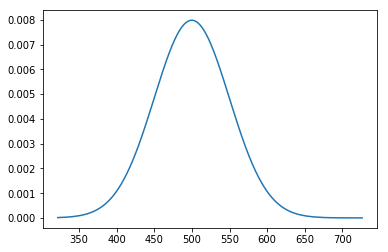

In [2]:
data = sorted(np.random.normal(500,50,10000))
pl.plot(data,s.norm.pdf(data,np.mean(data) , np.std(data)) )
pl.show()
data = np.array(data)

Now we try to minimize this cost function 'data' by using gradient decent.

## Why we minimize this cost function ? 
we have to find that parameter which minimize this function. It means find that mean_value and std_value by using that values we can plot as it is same graph.
we know the original Mean_value and std_value of this graph but lets us assume for some time we dont know.
and we try to find by using GRADIENT DECENT

### Working of gradient decent

We know our data come from Normal distribution and for Normal distribution equation of MLF is :
$$
y=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

we have to take the gradient of this function with respect to MUE and SIGMA


1. Take the Gradient of the loss function (Derivative)
2. Pick random value for the parameters
3. Plug the parameter value into gradient(deviation)
4. Calculate step_size = slope * learning_rate
5. Calculate new_parameter = old_parameter - stepsize
6. go to 3 (repeat)

new_parameter = old_parameter - (learning_rate * slope)

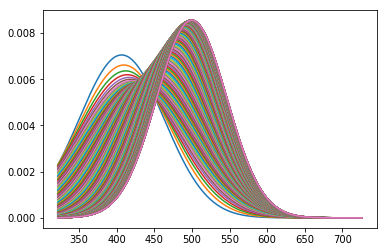

mean =  [499.73069665] std =  [46.64139249]


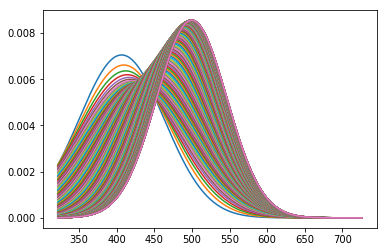

In [3]:
learning_rate = 0.01  # learning rate
epsilon = 0.001 # indicate when to stop while loop
initial_mu = 400.5265 # random value
initial_sigma = 40.652 # random value
x1=[]
y1=[]
z1=[]
initial_value = np.array([initial_mu,initial_sigma]).reshape(2,1)
while(True):
    del_mu = -((np.sum((data - initial_value[0])))/initial_value[1]**2) # gradient w.r.t to mean  
    del_sigma = ((len(data)/initial_sigma) - 
                 ((np.sum((data - initial_value[0])**2))/initial_value[1]**3)) # gradient w.r.t to std
    
    gradient = np.array([del_mu,del_sigma]).reshape(2,1) 
    
    new_value = initial_value - (learning_rate * gradient)
    x1.append(new_value[0])
    y1.append(new_value[1])
    # now we put new_value into Gaussian function and check weather these parameter are good or not
    
    func_old_val = -np.sum(np.log(s.norm.pdf(data,initial_value[0],initial_value[1])))
    
    func_new_val = -np.sum(np.log(s.norm.pdf(data,new_value[0],new_value[1])))
    z1.append(func_new_val)
    if abs(func_old_val - func_new_val) < epsilon : # this check weather their is more difference or not compare to old val
        
        break
        
    #print("The initial and final value of Neg Log Likelihood is {} and {}".format(func_old_val,func_new_val))
    pl.plot(data,s.norm.pdf(data,new_value[0] , new_value[1]) )
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(0.00003)
    print('mean = ', new_value[0] , "std = " , new_value[1])
    initial_value = new_value

# Now we check original parameters with new parameters which calculated by Gradient decent 


In [4]:
print('Original Mean = ', np.mean(data))
print('Original STD = ', np.std(data))
print('Calculated Mean = ',new_value[0])
print('Calculated STD =',new_value[1])

Original Mean =  499.8070497112613
Original STD =  49.959160296604544
Calculated Mean =  [499.73420646]
Calculated STD = [46.64138495]


### Cost function plotting 

<IPython.core.display.Javascript object>


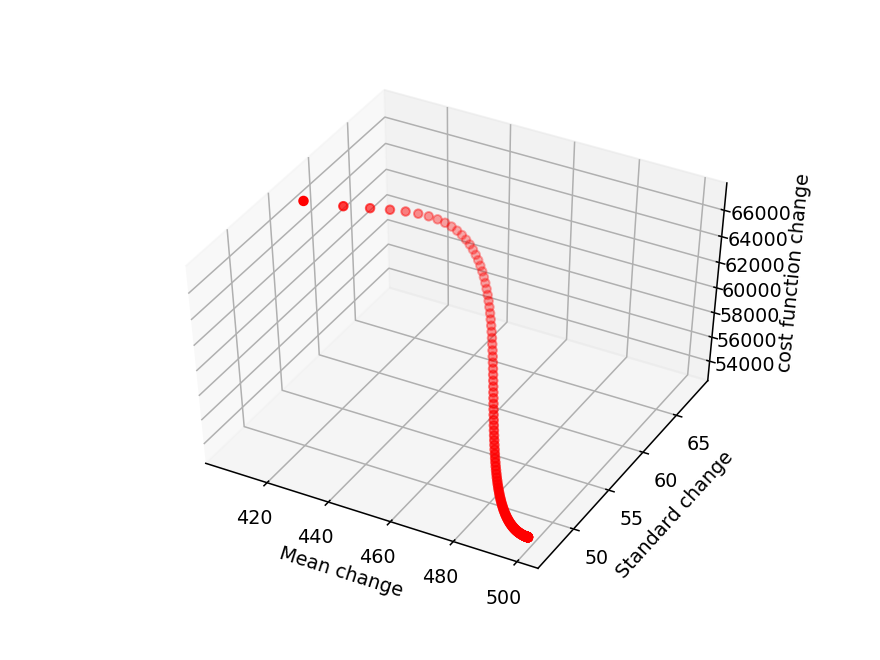

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, y1, z1, c='r', marker='o')
ax.set_xlabel('Mean change')
ax.set_ylabel('Standard change')
ax.set_zlabel('cost function change')
plt.show()